# **Project Description**

This mini-project will solve a problem with detecting histopathologic cancers by developing a deep learning solution that can intelligently detect these cancers without any human intervention. To introduce the problem of histopathologic cancer detection, this problem is mainly about identifying metastatic cancers in small image patches taken from larger digital pathology scans. The mini-project's methodology contains a deep learning solution that will consist of the following steps: Importing Machine Learning/Deep Learning Libraries, Data Collection and Pre-Processing, Exploratory Data Analysis (EDA), Deep Learning Model Building and Architecture, Training-and-Testing Data Split, Feature Engineering, Prediction, Performance Evaluation, and Conclusion. Finally, this mini-project will be submitted for peer-review upon its completion.

# **Import Libraries/Frameworks**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import zipfile
import cv2
import random
import pickle
import shutil

In [2]:
# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nezarhindi","key":"3f9a7fb5a85d93a657245e230d84a65d"}'}

In [3]:
# Create the .kaggle directory if it doesn't exist
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the correct folder
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions to avoid warnings
os.chmod("/root/.kaggle/kaggle.json", 600)

In [4]:
!kaggle competitions download -c histopathologic-cancer-detection

100% 6.31G/6.31G [02:48<00:00, 41.6MB/s]
100% 6.31G/6.31G [02:48<00:00, 40.1MB/s]


In [5]:
print(os.listdir())

# Unzip the dataset
with zipfile.ZipFile("histopathologic-cancer-detection.zip", "r") as zip_ref:
    zip_ref.extractall("histopathologic-cancer-detection")

# Verify extraction
os.listdir("histopathologic-cancer-detection")

['.config', 'histopathologic-cancer-detection.zip', 'sample_data']


['train', 'sample_submission.csv', 'train_labels.csv', 'test']

# **Exploratory Data Analysis (EDA)**

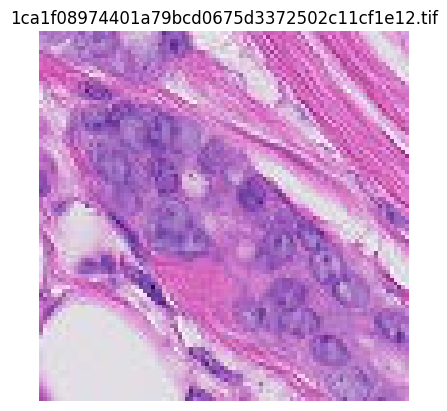

In [6]:
# Path to the training images
image_folder = "histopathologic-cancer-detection/train"

# Get a random image
random_image = random.choice(os.listdir(image_folder))
image_path = os.path.join(image_folder, random_image)

# Load and display the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title(random_image)
plt.axis("off")
plt.show()

In [7]:
train = pd.read_csv('./histopathologic-cancer-detection/train_labels.csv', dtype=str)
train_img_dir = './histopathologic-cancer-detection/train/'
test_img_dir = './histopathologic-cancer-detection/test/'
print(train.shape)

(220025, 2)


In [8]:
train.head(15)
train['fileName'] = train['id'] + '.tif'

train.head(15)

,id,label,fileName
0,f38a6374c348f90b587e046aac6079959adf3835,0,f38a6374c348f90b587e046aac6079959adf3835.tif
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1,c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif
2,755db6279dae599ebb4d39a9123cce439965282d,0,755db6279dae599ebb4d39a9123cce439965282d.tif
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif
4,068aba587a4950175d04c680d38943fd488d6a9d,0,068aba587a4950175d04c680d38943fd488d6a9d.tif
5,acfe80838488fae3c89bd21ade75be5c34e66be7,0,acfe80838488fae3c89bd21ade75be5c34e66be7.tif
6,a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da,1,a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da.tif
7,7f6ccae485af121e0b6ee733022e226ee6b0c65f,1,7f6ccae485af121e0b6ee733022e226ee6b0c65f.tif
8,559e55a64c9ba828f700e948f6886f4cea919261,0,559e55a64c9ba828f700e948f6886f4cea919261.tif
9,8eaaa7a400aa79d36c2440a4aa101cc14256cda4,0,8eaaa7a400aa79d36c2440a4aa101cc14256cda4.tif


['0' '1']
[130908  89117]


<BarContainer object of 2 artists>

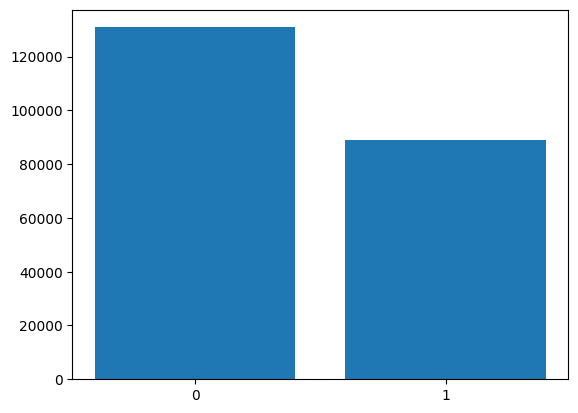

In [9]:
numberOfCatagories = train['label'].unique()
print(numberOfCatagories)
numberOfCatagories = len(numberOfCatagories)

labels, counts = np.unique(train['label'],return_counts=True)
print(counts)

plt.bar(labels, counts)

# **Feature Engineering**

(96, 96)

(96, 96)

(96, 96)

(96, 96)

(96, 96)



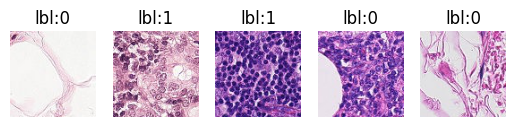

(176020, 3)
(44005, 3)


In [10]:
sampleSet = train.sample(5)
for idx, img_name in enumerate(sampleSet['fileName']):
    img_path = os.path.join(train_img_dir, img_name)
    img = Image.open(img_path)
    print(img.size)
    plt.subplot(1, len(sampleSet), idx+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'lbl:{sampleSet.iloc[idx,1] }')
    print()
plt.show()

train_df, valid_df = train_test_split(train, test_size=0.2, random_state=1, stratify=train.label)

print(train_df.shape)
print(valid_df.shape)

In [11]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

BATCH_SIZE = 64
IMG_WIDTH = 96
IMG_HEIGHT = 96
train_path = train_img_dir

train_loader = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = train_path,
    x_col = 'fileName',
    y_col = 'label',
    batch_size = BATCH_SIZE,
    seed = 1,
    shuffle = True,
    class_mode = 'categorical',
    target_size = (IMG_WIDTH, IMG_HEIGHT)
)

valid_loader = valid_datagen.flow_from_dataframe(
    dataframe = valid_df,
    directory = train_path,
    x_col = 'fileName',
    y_col = 'label',
    batch_size = BATCH_SIZE,
    seed = 1,
    shuffle = True,
    class_mode = 'categorical',
    target_size = (IMG_WIDTH, IMG_HEIGHT)
)

Found 176020 validated image filenames belonging to 2 classes.
Found 44005 validated image filenames belonging to 2 classes.


# **Deep Neural Network (DNN) Architecture**

In [12]:
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)

baseModel = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_tensor=tf.keras.Input(shape=IMG_SHAPE)
)

baseModel.trainable = True
baseModel.summary()

cnn_model = Sequential([
    baseModel,
    Flatten(),
    #Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(numberOfCatagories, activation='softmax')
])

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 96, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 102, 102, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 48, 48, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 50, 50, 64)     │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 24, 24, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 24, 24, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 24, 24, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 24, 24, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 24, 24, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 24, 24, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 26, 26, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 24, 24, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 24, 24, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 24, 24, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 24, 24, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

# **Deep Learning Model Training and Validation**

In [13]:
opt = tf.keras.optimizers.Adam(0.001)
cnn_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', 'AUC'])

In [14]:
# Example usage
n_epochs = 10
h1 = cnn_model.fit(
    train_loader,
    epochs=n_epochs,
    validation_data=valid_loader,  # Ensure `valid_loader` is defined beforehand
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 96, 96, 3))
  warnings.warn(msg)


2751/2751 ━━━━━━━━━━━━━━━━━━━━ 509s 162ms/step - AUC: 0.8937 - accuracy: 0.8268 - loss: 0.4659 - val_AUC: 0.6117 - val_accuracy: 0.5950 - val_loss: 1.6663
Epoch 2/10
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 371s 135ms/step - AUC: 0.9572 - accuracy: 0.9001 - loss: 0.2685 - val_AUC: 0.8301 - val_accuracy: 0.7591 - val_loss: 0.6304
Epoch 3/10
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 370s 134ms/step - AUC: 0.9532 - accuracy: 0.8924 - loss: 0.2825 - val_AUC: 0.6957 - val_accuracy: 0.6547 - val_loss: 1.7062
Epoch 4/10
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 369s 134ms/step - AUC: 0.9599 - accuracy: 0.8994 - loss: 0.2618 - val_AUC: 0.9731 - val_accuracy: 0.9210 - val_loss: 0.2093
Epoch 5/10
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 374s 136ms/step - AUC: 0.9654 - accuracy: 0.9087 - loss: 0.2399 - val_AUC: 0.9789 - val_accuracy: 0.9336 - val_loss: 0.1836
Epoch 6/10
2751/2751 ━━━━━━━━━━━━━━━━━━━━ 385s 140ms/step - AUC: 0.9623 - accuracy: 0.9032 - loss: 0.2552 - val_AUC: 0.9308 - val_accuracy: 0.8505 - val_loss: 0.3903
Epoch 7/10
2751

# **Results and Analysis**

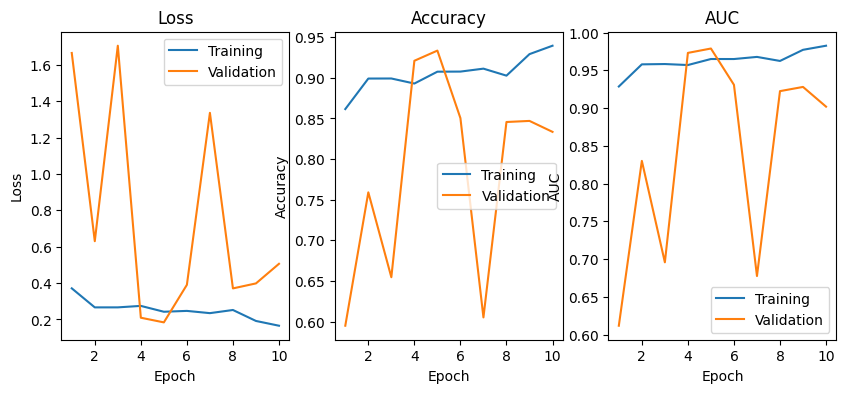

In [15]:
def plotHistory(history):
    n_epochs = len(history['loss'])

    plt.figure(figsize=[10,4])
    plt.subplot(1,3,1)
    plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
    plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(range(1, n_epochs+1), history['accuracy'], label='Training')
    plt.plot(range(1, n_epochs+1), history['val_accuracy'], label='Validation')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
    plt.legend()

    plt.subplot(1,3,3)
    plt.plot(range(1, n_epochs+1), history['AUC'], label='Training')
    plt.plot(range(1, n_epochs+1), history['val_AUC'], label='Validation')
    plt.xlabel('Epoch'); plt.ylabel('AUC'); plt.title('AUC')
    plt.legend()

    plt.show()

plotHistory(h1.history)

In [16]:
cnn_model.save('AM_histopathologic-cancer-detection_v01.h5')
pickle.dump(h1.history, open(f'histopathologic-cancer-detection_v01.pk1','wb'))

In [32]:
# Two-dimensional list for test (No labels)
image_list_test = []
for test in os.listdir(test_img_dir):
    if test.endswith(".tif"):
        file_path = os.path.join(test_img_dir, test)
        # label = "Test"  # Replace the label
        # image_list_test.append([file_path, label])
        image_list_test.append([file_path])


print(image_list_test[:5])

data_test = image_list_test
# Create dataframes for test
df_test = pd.DataFrame(data_test,columns = ['id'])

testGenerator = ImageDataGenerator(rescale=1./255.)
testDataset = testGenerator.flow_from_dataframe(
  dataframe = df_test,
  class_mode = None, # Because it doesn't have any label
  x_col = "id",
  y_col = None, # Because it doesn't have any label
  batch_size = BATCH_SIZE,
  seed = 42,
  shuffle = False, # No need to shuffle test data
  target_size = (IMG_HEIGHT,IMG_WIDTH)
)

[['./histopathologic-cancer-detection/test/5ce5aae7abb448f4fcd332b57947f11db966222b.tif'], ['./histopathologic-cancer-detection/test/f1b6f6c8cb48947a8bef7a03593501cab4e106a6.tif'], ['./histopathologic-cancer-detection/test/c0c1030fdbc1ad1839521d8295ae6fc8bdc7a7e4.tif'], ['./histopathologic-cancer-detection/test/298c757dd55d81d0bf98cd9312416758905014f7.tif'], ['./histopathologic-cancer-detection/test/60bd64e348faf0894b43bbb7492f50d866f4b412.tif']]
Found 57458 validated image filenames.


In [34]:
df_test_Nezar = df_test.copy()

# prediction test data
predictions = cnn_model.predict(testDataset)

# Transform the output into string values '0' and '1'.
binary_predictions = (predictions[:, 1] > 0.5).astype(int).flatten()

string_predictions = [str(pred) for pred in binary_predictions]

# Add predictions to the test DataFrame.
df_test_Nezar['predictions_binary'] = binary_predictions
df_test_Nezar['predictions_string'] = string_predictions

# Save in CSV file
df_test_Nezar.to_csv("test_predictions.csv", index=False)

print(df_test_Nezar.head())

# Check the label to evaluate the model and print the results
if 'label' in df_test_Nezar.columns:
    df_test_Nezar['label'] = df_test_Nezar['label'].astype(int)
    Evaluate_Nezar = cnn_model.evaluate(testDataset, df_test_Nezar['label'])
    print("Model Evaluation:", Evaluate_Nezar)
else:
    print("No labels found in test data. Evaluation is not possible.")

898/898 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step
                                                  id  predictions_binary  \
0  ./histopathologic-cancer-detection/test/5ce5aa...                   0   
1  ./histopathologic-cancer-detection/test/f1b6f6...                   0   
2  ./histopathologic-cancer-detection/test/c0c103...                   0   
3  ./histopathologic-cancer-detection/test/298c75...                   0   
4  ./histopathologic-cancer-detection/test/60bd64...                   0   

  predictions_string  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
No labels found in test data. Evaluation is not possible.


# **Conclusion**

After undergoing through the methodological process of implementing this mini-project, this process included importing all essential libraries and frameworks, Exploratory Data Analysis (EDA), Feature Engineering, Deep Neural Network (DNN) Architecture, Deep Learning Model Training and Validation, as well as Results and Analysis after testing. Deep Learning Frameworks utilized in this notebook include Keras and Tensorflow. EDA of this notebook encompassed analyzing and visualizing significantly large image datasets. Feature Engineering involved splitting the image dataset into 70% training, 10% validation, and 20% testing. The deep neural network architecture of this mini-project was Convolutional Neural Network (CNN). Upon training and validating this deep learning model, this model has generated an adequately high accuracy rate of 93.89%. The results of this mini-project implementation have been analyzed and visualized with a wide range of visual charts, such as line and bar charts.